In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Manual Creation of Triples

In [ ]:
import spacy
#loading spacy en_core_web_sm model 
nlp = spacy.load('en_core_web_sm')

doc = nlp(text)

for sent in doc.sents:
    print(sent)

#printing word and it's dependency
for i in range(len(doc)):
  print(doc[i].text,'..................',doc[i].dep_)

COVID-19 is a virus belonging to the coronavirus family, which includes a large number of viruses that can cause a wide variety of diseases in humans.
COVID-19 .................. nsubj
is .................. ROOT
a .................. det
virus .................. attr
belonging .................. acl
to .................. prep
the .................. det
coronavirus .................. compound
family .................. pobj
, .................. punct
which .................. nsubj
includes .................. relcl
a .................. det
large .................. amod
number .................. dobj
of .................. prep
viruses .................. pobj
that .................. nsubj
can .................. aux
cause .................. relcl
a .................. det
wide .................. amod
variety .................. dobj
of .................. prep
diseases .................. pobj
in .................. prep
humans .................. pobj
. .................. punct


In [ ]:
# display sentence with its entities chunk
from spacy import displacy
displacy.render(doc, style='dep', jupyter = True, options={'compact':True, 'distance': 100})

In [ ]:
COVID-19 (nsubj)
is belonging to (ROOT acl prep)
coronavirus family (compound pobj)
which includes (nsubj relcl)
large number of viruses that  can cause (amod dobj prep pobj nsubj aux relcl)
wide varity of diseases in humans (amod dobj prep pobj prep pobj)

In [ ]:
# importing files to extract data from xml files
from xml.dom import minidom
import os
import re

Code for text extraction from xml files in text chunks

In [ ]:
DIR = "/content/drive/My Drive/Project/MasterProject/search_result/"
files = [name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]
fileChunk = []
nlp_data_list = []
for j in range(0, len(files), 40):
  fileChunk.append(files[j: j + 40])
i = 0
for filenames in fileChunk:
  nlp_data_list = []
  for filename in filenames:
    if not filename.endswith('.xml'): continue
    fullname = os.path.join(DIR, filename)
    #print(fullname)
    string = textExtractor(fullname)
    nlp_data_list.append(string)
  textData = ''
  textData = textData.join(nlp_data_list)
  text_file = open("/content/drive/My Drive/Project/MasterProject/data/fileChunk" + str(i) +".txt", "w")
  i = i+1
  n = text_file.write(textData)
  text_file.close()

In [ ]:
def textExtractor(fullname):
    mydoc = minidom.parse(fullname)
    download_date = tagExtractor(mydoc, 'download_date')
    brief_title = tagExtractor(mydoc, 'brief_title')
    official_title  = tagExtractor(mydoc, 'official_title')
    agency  = tagExtractor(mydoc, 'agency')
    agency_class  = tagExtractor(mydoc, 'agency_class')
    if agency != 'NULL' and agency_class != 'NULL' :
      String1 = "Lead sponsors are " + agency + " which is " + agency_class +" class. " ########################################################
    else:
      String1 = ''
    start_date  = tagExtractor(mydoc, 'start_date')
    completion_date  = tagExtractor(mydoc, 'completion_date')
    if start_date  != 'NULL' and completion_date != 'NULL':
      String2 = "Project started in " + start_date + " and anticipated to complete by " + completion_date +" ."######################################################
    else:
      String2= ''
    enrollment = tagExtractor(mydoc, 'enrollment')
    condition = mydoc.getElementsByTagName('condition')
    all_condition = ""
    for i in range(len(condition)):
      all_condition += condition[i].firstChild.nodeValue
      if i == len(condition)-1:
        all_condition += ". "
      else:
        all_condition += ", "
    if enrollment  != 'NULL' :
      String3 = "There is total enrollment of "+ enrollment +" participatns with condition of " + all_condition #############################################"Eligible to " + gender+ " with the minimun age of " + minimum_age+ "."########
    else:
      String3 = ""
    textblock = mydoc.getElementsByTagName('textblock')
    all_textblock = ""
    for i in range(len(textblock)):
      all_textblock += textblock[i].firstChild.nodeValue
      all_textblock += ". "

    all_textblock = re.sub(r'\r\n', '', all_textblock)
    all_textblock = re.sub(r'\n', '', all_textblock)
    all_textblock = re.sub(r'  ', '', all_textblock)
    all_textblock = all_textblock.replace('..','. ')
    gender = tagExtractor(mydoc, 'gender')
    minimum_age = tagExtractor(mydoc, 'minimum_age')
    if gender != 'NULL' and minimum_age != 'NULL':
      String4 = "Eligible to " + gender+ " with the minimun age of " + minimum_age+ ". " #####################################################
    else:
      String4 = ''
    role = tagExtractor(mydoc, 'role')
    last_name = tagExtractor(mydoc, 'last_name')
    phone = tagExtractor(mydoc, 'phone')
    if role != 'NULL' and last_name != "NULL" and phone != 'NULL':
      String5 = "The contact information of "+ str(role) + " " + str(last_name) + " is " + str(phone)+ ". " #########################################
    else:
      String5 = ''
    study_first_submitted = tagExtractor(mydoc, 'study_first_submitted')
    verification_date = tagExtractor(mydoc, 'verification_date')
    if study_first_submitted != 'NULL' and verification_date != 'NULL':
      String6 = "The study first submitted on "+study_first_submitted+" and verified on " + verification_date +". " ############################################
    else:
      String6 = ''
    String = download_date + ". " + brief_title + ". " + official_title + ". " + "Lead sponsors are " + agency + " which is " + agency_class +" class. " + "Lead sponsors are " + agency + " which is " + \
          agency_class +" class. " + "Lead sponsors are " + agency + " which is " + agency_class +" class. " +"Project started in " + start_date + " and anticipated to complete by " + \
          completion_date +" . " +"There is total enrollment of "+ enrollment +" participatns with condition of " + all_condition + all_textblock + "Eligible to " + gender+ " with the minimun age of " + \
          minimum_age+ ". " + "The contact information of "+ str(role) + " " + str(last_name) + " is " + str(phone)+ ". " + "The study first submitted on "+study_first_submitted+" and verified on " + verification_date + \
          ". "
    return String

In [ ]:
def tagExtractor(mydoc,tag):
  extractedData = mydoc.getElementsByTagName(tag)
  try:
    extractedData = extractedData[0].firstChild.nodeValue
  except IndexError:
    extractedData = 'NULL'
  return str(extractedData)

In [ ]:
# initialising nlp libraries
import re
import pandas as pd
import bs4
import requests
import spacy

from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
# code for entity extraction
from collections import deque

def get_entities(sent):
  #print(sent)
  doc = nlp(sent)
  objIndex = []
  for tok in doc:
    if tok.dep_.find("subj") == 1 or tok.dep_.find("obj") == 1 :
      objIndex.append(1)
    else:
      objIndex.append(-1)
  objIdx = []
  for index,x in enumerate(objIndex):
    if x == 1:
      objIdx.append(index)
  if not objIdx:
    return []
  objectEntity = []
  obj = deque()
  for objEntIdx in objIdx:
    obj = deque()
    obj.appendleft(doc[objEntIdx])
    for idx in reversed(range(objEntIdx)):
      #print(doc[idx].text)
      if doc[idx].dep_ == "prep" or doc[idx].dep_ == "compound" or doc[idx].dep_.endswith("mod") == True or doc[idx].dep_ =="conj" or doc[idx].dep_ == "punct":
        dependency = doc[idx]
        obj.appendleft(dependency)
      else:
        continue
    #print(obj)
    obj1 = list(obj)
    obj2  = [i.text for i in obj1]
    entity = ' '
    entity = entity.join(obj2)
    objectEntity.append(entity)
  return objectEntity

In [ ]:
# code for relation extration
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'acl'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'punct','OP':"?"},  
            {'DEP':'attr','OP':"?"},  
            {'DEP':'amod','OP':"?"},  
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  pattern1 = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'punct','OP':"?"},  
            {'DEP':'attr','OP':"?"},  
            {'DEP':'amod','OP':"?"},  
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 
  matcher.add("matching_2", None, pattern1) 

  matches = matcher(doc)
  #i = len(matches) - 1
  #print(matches,'...........',i)
  flag = 'null'
  relation = deque()
  for k in reversed(range(len(matches))):
    span = doc[matches[k][1]:matches[k][2]] 
    if flag == span.root.head.text:
      continue
    else:
      #print('root-------------',span.root.head)
      relation.appendleft(span.text)
    flag = span.root.head.text
  #x = doc[matches[i][1]:matches[i][2]]
  if not relation:
    return []
  return list(relation)

In [ ]:
#code for triple extractor
def tripleExtractor(text):
  relation = get_relation(text)
  entity = get_entities(text)
  if not entity:
    return []
  temp = []
  triple = []
  j = 0
  if len(entity) >= len(relation):
    for i in range(len(relation)):
      if j+1 >= len(relation):
        try:
          temp = entity[j-1],relation[i],entity[j]
        except IndexError:
          try:
            temp = entity[j-2],relation[i],entity[j-1]
          except IndexError:
            continue
        #print('hi')
      else:
        temp = entity[j],relation[i],entity[j+1]
      j = j+2
      #print(temp)
      triple.append(temp)
  else:
    for i in range(len(entity)):
      if j+1 > len(entity):
        try:
          temp = relation[j-1],entity[i],relation[j]
        except IndexError:
          try:
            temp = relation[j-2],entity[i],relation[j-1]
          except IndexError:
            continue
        #print('hi')
      else:
        temp = relation[j],entity[i],relation[j+1]
      j = j+2
      #print(temp)
      triple.append(temp)

  return triple

In [ ]:
# Not in use
def tripleCreator(text):
  doc = nlp(text)
  triples = []
  for sent in doc.sents:
    print(sent.text)
    triple = tripleExtractor(sent.text)
    #source = [i[0] for i in triple]
    #relation = [i[1] for i in triple]
    #target = [i[2] for i in triple]
    print(triple)
    if not triple: continue
    else:
      triples.append(triple)
    extractedTriple = []
    for i in range(len(triples)):
      for j in triples[i]:
        extractedTriple.append(j)
    source = [i[0] for i in extractedTriple]
    relation = [i[1] for i in extractedTriple]
    target = [i[2] for i in extractedTriple]
    df = pd.DataFrame({'source':source, 'target':target, 'edge':relation})
    return df

Code to create triples and store them in chunks of triple and save in csv files

In [ ]:
DATA_DIR = "/content/drive/My Drive/Project/MasterProject/data/"
files = [name for name in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, name))]
nlp_data_list = []
i = 0
for filename in files:
  print(filename)
  if not filename.endswith('.txt'): continue
  fullname = os.path.join(DATA_DIR, filename)
  f = open(fullname, "r")
  text = f.read()
  #print(text)
  doc = nlp(text)
  triples = []
  for sent in doc.sents:
    #print(sent.text)
    triple = tripleExtractor(sent.text)
    if not triple: continue
    else:
      triples.append(triple)
  extractedTriple = []
  for i in range(len(triples)):
    for j in triples[i]:
      extractedTriple.append(j)
  source = [i[0] for i in extractedTriple]
  relation = [i[1] for i in extractedTriple]
  target = [i[2] for i in extractedTriple]
  df = pd.DataFrame({'source':source, 'target':target, 'edge':relation})
  df.to_csv("/content/drive/My Drive/Project/MasterProject/CSVdata/CSVdata" + str(i) +".csv")
  #print(df.head(2))
  i = i+1

fileChunk0.txt
fileChunk50.txt
fileChunk100.txt
fileChunk150.txt
fileChunk200.txt
fileChunk250.txt
fileChunk300.txt
fileChunk350.txt
fileChunk400.txt
fileChunk450.txt
fileChunk500.txt
fileChunk550.txt
fileChunk600.txt
fileChunk650.txt
fileChunk700.txt
fileChunk750.txt
fileChunk800.txt
fileChunk850.txt
fileChunk900.txt
fileChunk950.txt
fileChunk1000.txt
fileChunk1050.txt
fileChunk1100.txt
fileChunk1150.txt
fileChunk1200.txt
fileChunk1250.txt
fileChunk1300.txt
fileChunk1350.txt
fileChunk1400.txt
fileChunk1450.txt
fileChunk1500.txt
fileChunk1550.txt
fileChunk1600.txt
fileChunk1650.txt
fileChunk1700.txt
fileChunk1750.txt
fileChunk1800.txt
fileChunk1850.txt
fileChunk1900.txt
fileChunk1950.txt
fileChunk2000.txt
fileChunk2050.txt
fileChunk2100.txt
fileChunk2150.txt
fileChunk2200.txt
fileChunk2250.txt
fileChunk2300.txt
fileChunk2350.txt
fileChunk2400.txt
fileChunk2450.txt
fileChunk2500.txt
fileChunk2550.txt
fileChunk2600.txt
fileChunk2650.txt
fileChunk2700.txt
fileChunk2750.txt
fileChunk2800.t

Code to combine all csv files together.

In [ ]:
cd /content/drive/My Drive/Project/MasterProject/CSVdata
ls CSVdata*.csv > filename.txt

In [ ]:
f = open("/content/drive/My Drive/Project/MasterProjectApurva/generatedTriples/filename.txt", "r")
filename = f.read()
filename = filename.split()
f.close()
concatCSV = "/content/drive/My Drive/Project/MasterProject/CSVdata"

filePath = []
for file in filename:
  if not file.endswith('.csv'): continue
  fullname = os.path.join(concatCSV, file)
  print(fullname)
  filePath.append(fullname)
  #combined_csv = pd.concat([pd.read_csv(f) for f in fullname ])  
df = pd.concat([pd.read_csv(f) for f in filePath ])  

In [ ]:
# import pandas as pd
# df = pd.read_csv('/content/drive/My Drive/Project/MasterProject/finalExtractedtriples.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 0.1,source,target,edge
0,0,0,on November,ClinicalTrials.gov,processed
1,1,1,Stress Related in Family of COVID-19 to ICU,Stress Related Disorders,Admitted to
2,2,2,Psychological Distress in Family of With COVID...,Psychological Distress in Family Members,Symptoms in
3,3,3,"Lead of , which",Lead sponsors,are University
4,4,4,"Lead of , which",Lead sponsors,are University
...,...,...,...,...,...
139083,876,876,Tocilizumab ( therapy,Tocilizumab ( ) plasma therapy - already steroids,receiving
139084,877,877,Tocilizumab ( ) plasma therapy - already steroids,Tocilizumab ( ) plasma therapy - already from ...,receiving
139085,878,878,to with minimun of 18 Years,to All,Eligible to
139086,879,879,"contact of Principal Investigator Fernando , MD",contact information,is 787


Samples of knowledge graph on specific relation:

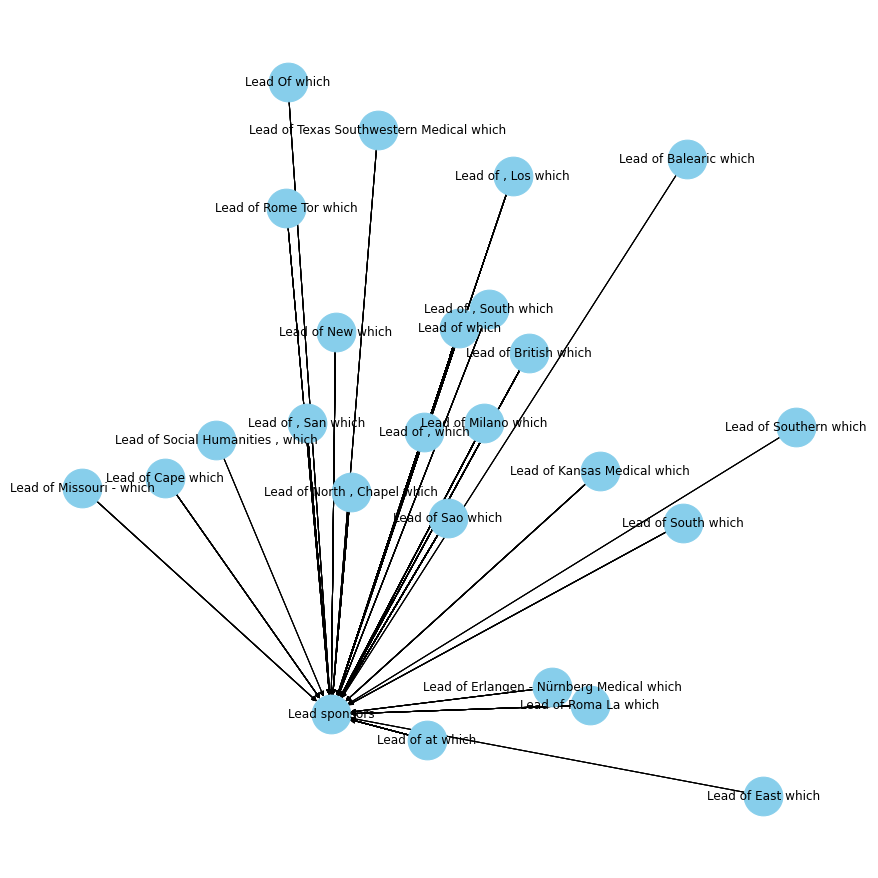

In [ ]:
# For "are University" relation
G=nx.from_pandas_edgelist(df[df['edge']=="are University"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

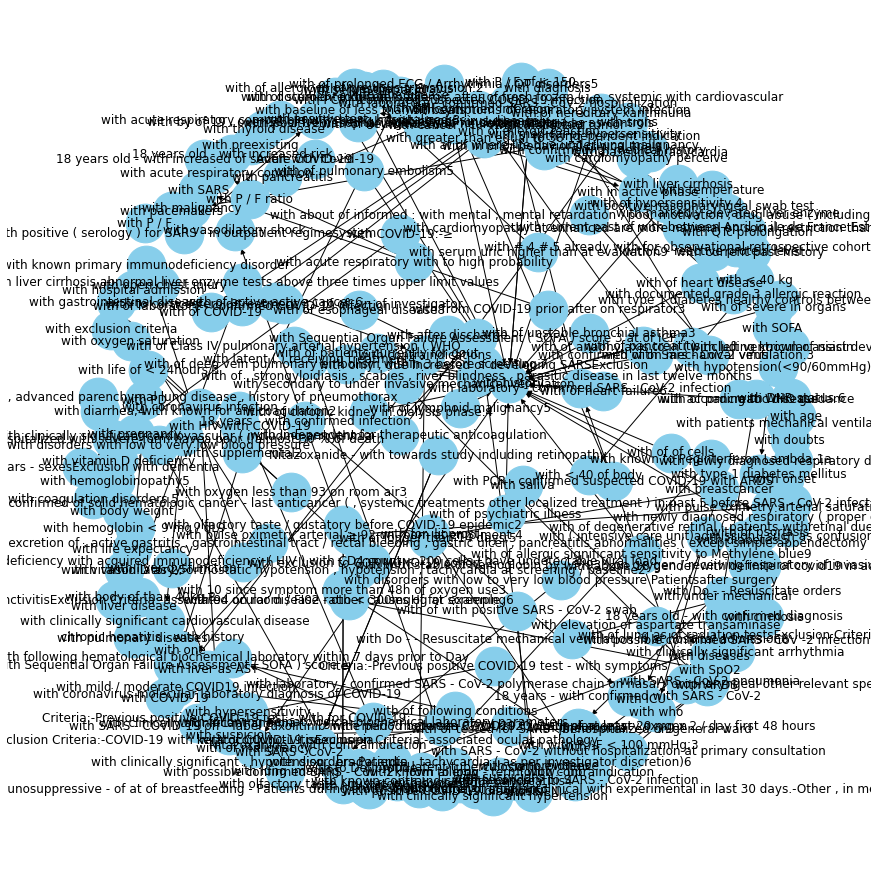

In [ ]:
# For "Patients with" relation
G=nx.from_pandas_edgelist(df[df['edge']=="Patients with"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

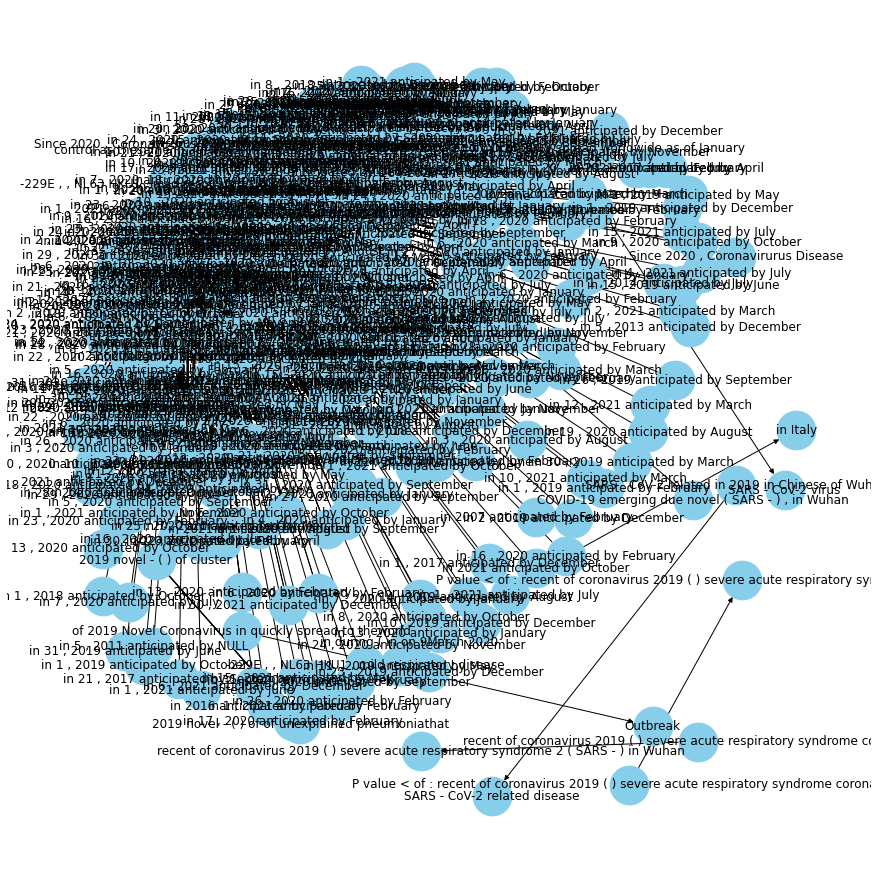

In [ ]:
# For "started in" relation
G=nx.from_pandas_edgelist(combined_csv[combined_csv['edge']=="started in"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
G=nx.from_pandas_edgelist(df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 61537 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 61537 missing from current font.
  font.set_text

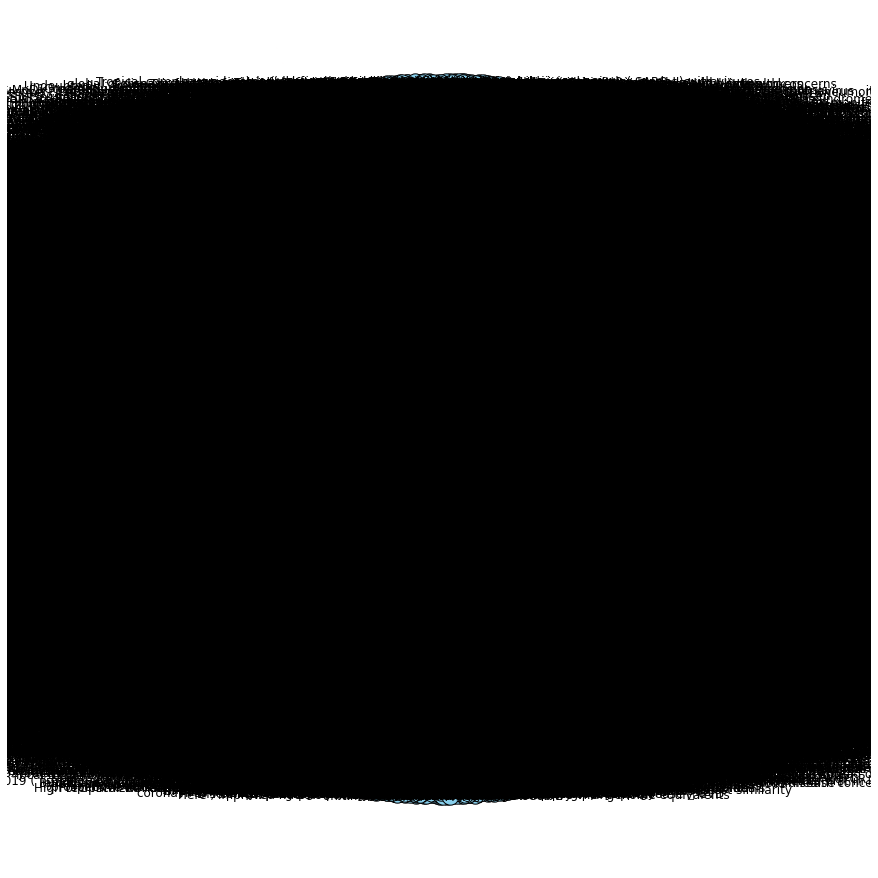

In [ ]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, edge_color='red', edgecolors='black')
plt.show()

Installation process of neuralcoref:

In [ ]:
mkdir temp
cd temp
!git clone https://github.com/huggingface/neuralcoref.git
!pip install -U spacy
!python -m spacy download en
cd neuralcoref
!pip install -r requirements.txt
!pip install -e .
!python -m spacy download en_core_web_md en
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

Cloning into 'neuralcoref'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 753 (delta 1), reused 2 (delta 0), pack-reused 748
Receiving objects: 100% (753/753), 67.82 MiB | 31.81 MiB/s, done.
Resolving deltas: 100% (398/398), done.
     |████████████████████████████████| 10.4MB 5.5MB/s 
     |████████████████████████████████| 1.1MB 47.4MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


     |████████████████████████████████| 12.1MB 2.8MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp36-none-any.whl size=12047110 sha256=fabce6117f1bc6dee954cd187a1ef3848d98a1218a367483be967a13ab5cb3a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-i8e_nnzz/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
#code to create noun chunks
import pandas as pd
import re
import spacy
import neuralcoref

nlp = en_core_web_sm.load()
neuralcoref.add_to_pipe(nlp)


def get_entity_pairs(text, coref=True):
    # preprocess text
    text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
    text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters

    def refine_ent(ent, sent):
        unwanted_tokens = (
            'PRON',  # pronouns
            'PART',  # particle
            'DET',  # determiner
            'SCONJ',  # subordinating conjunction
            'PUNCT',  # punctuation
            'SYM',  # symbol
            'X',  # other
        )
        ent_type = ent.ent_type_  # get entity type
        if ent_type == '':
            ent_type = 'NOUN_CHUNK'
            ent = ' '.join(str(t.text) for t in
                           nlp(str(ent)) if t.pos_
                           not in unwanted_tokens and t.is_stop == False)
        elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
            refined = ''
            for i in range(len(sent) - ent.i):
                if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                    refined += ' ' + str(ent.nbor(i))
                else:
                    ent = refined.strip()
                    break

        return ent, ent_type

    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = []
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = spacy.util.filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span, attrs={'tag': span.root.tag,
                                            'dep': span.root.dep}) for span in spans]
        deps = [token.dep_ for token in sent]

        # limit our example to simple sentences with one subject and object
        if (deps.count('obj') + deps.count('dobj')) != 1\
                or (deps.count('subj') + deps.count('nsubj')) != 1:
            continue

        for token in sent:
            if token.dep_ not in ('obj', 'dobj'):  # identify object nodes
                continue
            subject = [w for w in token.head.lefts if w.dep_
                       in ('subj', 'nsubj')]  # identify subject nodes
            if subject:
                subject = subject[0]
                # identify relationship by root dependency
                relation = [w for w in token.ancestors if w.dep_ == 'ROOT']
                if relation:
                    relation = relation[0]
                    # add adposition or particle to relationship
                    if relation.nbor(1).pos_ in ('ADP', 'PART'):
                        relation = ' '.join((str(relation), str(relation.nbor(1))))
                else:
                    relation = 'unknown'

                subject, subject_type = refine_ent(subject, sent)
                token, object_type = refine_ent(token, sent)

                ent_pairs.append([str(subject), str(relation), str(token),
                                  str(subject_type), str(object_type)])

    ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(ent) == '' for ent in sublist)]
    pairs = pd.DataFrame(ent_pairs, columns=['subject', 'relation', 'object',
                                             'subject_type', 'object_type'])
    print('Entity pairs extracted:', str(len(ent_pairs)))

    return pairs

In [ ]:
# code to create triples and save in csv format for small chunks of triples
import os
DATA_DIR = "/content/drive/My Drive/Project/MasterProject/data/"
files = [name for name in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, name))]
nlp_data_list = []
i = 0
for filename in files:
  print(filename)
  if not filename.endswith('.txt'): continue
  fullname = os.path.join(DATA_DIR, filename)
  f = open(fullname, "r")
  text = f.read()
  #print(text)
  #doc = nlp(text)
  df = get_entity_pairs(text)
  df.to_csv("/content/drive/My Drive/Project/MasterProject/CSVdata/CSVdata" + str(i) +".csv")
  #print(df.head(2))
  i = i+1

fileChunk0.txt
Entity pairs extracted: 108
fileChunk1.txt
Entity pairs extracted: 73
fileChunk2.txt
Entity pairs extracted: 93
fileChunk3.txt
Entity pairs extracted: 102
fileChunk4.txt
Entity pairs extracted: 120
fileChunk5.txt
Entity pairs extracted: 102
fileChunk6.txt
Entity pairs extracted: 89
fileChunk7.txt
Entity pairs extracted: 116
fileChunk8.txt
Entity pairs extracted: 130
fileChunk9.txt
Entity pairs extracted: 106
fileChunk10.txt
Entity pairs extracted: 117
fileChunk11.txt
Entity pairs extracted: 94
fileChunk12.txt
Entity pairs extracted: 112
fileChunk13.txt
Entity pairs extracted: 93
fileChunk14.txt
Entity pairs extracted: 109
fileChunk15.txt
Entity pairs extracted: 121
fileChunk16.txt
Entity pairs extracted: 112
fileChunk17.txt
Entity pairs extracted: 94
fileChunk18.txt
Entity pairs extracted: 119
fileChunk19.txt
Entity pairs extracted: 115
fileChunk20.txt
Entity pairs extracted: 122
fileChunk21.txt
Entity pairs extracted: 107
fileChunk22.txt
Entity pairs extracted: 111
file

In [2]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/drive/My Drive/Project/MasterProject/finalExtractedtriples.csv')

In [9]:
df

,Unnamed: 0,Unnamed: 0.1,source,target,edge
0,0,0,on November,ClinicalTrials.gov,processed
1,1,1,Stress Related in Family of COVID-19 to ICU,Stress Related Disorders,Admitted to
2,2,2,Psychological Distress in Family of With COVID...,Psychological Distress in Family Members,Symptoms in
3,3,3,"Lead of , which",Lead sponsors,are University
4,4,4,"Lead of , which",Lead sponsors,are University
...,...,...,...,...,...
139083,876,876,Tocilizumab ( therapy,Tocilizumab ( ) plasma therapy - already steroids,receiving
139084,877,877,Tocilizumab ( ) plasma therapy - already steroids,Tocilizumab ( ) plasma therapy - already from ...,receiving
139085,878,878,to with minimun of 18 Years,to All,Eligible to
139086,879,879,"contact of Principal Investigator Fernando , MD",contact information,is 787


In [10]:
df1 = pd.read_csv('/content/drive/My Drive/Project/MasterProject/CSVdata/finalExtractedtriples.csv')
df1['source'] = df1['subject']
df1['target'] = df1['object']
df1['edge'] = df1['relation']
df1=df1.drop(['subject','relation','object','subject_type','object_type'], axis =1)

In [23]:
df1

,Unnamed: 0,Unnamed: 0.1,source,target,edge
0,0,0,ClinicalTrials.gov,data,processed
1,1,1,Theresearchers,patients,recruit
2,2,2,ClinicalTrials.gov,data,processed
3,3,3,binge,disorders,Obese patients with
4,4,4,Criteria:-patients,lockdown period,experiment
...,...,...,...,...,...
10528,101,101,ClinicalTrials.gov,data,processed
10529,102,102,heparin,throughmultiple mechanisms,thought
10530,103,103,investigators,asmarkers,assess
10531,104,104,Acute opacities,effusions,include
